In [1]:
import numpy as np
import pandas as pd
# import pymysql as pskl #Tahap preprocessing
import matplotlib.pyplot as plt

# Menampilkan semua array
# np.set_printoptions(threshold=np.nan)

In [2]:
normalized_df = pd.read_csv("preprocessing.csv")
normalized_df = normalized_df.iloc[:,1:]
normalized_df.head()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,1,0.468354,0.666667,0.750000,0.250000,0.0,0.286517,0.250000,0.166667,0.620198,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,0.506329,0.666667,0.250000,0.500000,0.0,0.202247,0.153846,0.208333,0.620198,...,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,6,0.620253,1.000000,0.500000,0.750000,0.0,0.022472,0.144231,0.145833,0.680000,...,0.100917,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,14,0.721519,0.333333,0.721616,0.114629,0.0,0.157303,0.730769,0.875000,0.400000,...,0.100917,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
4,17,0.455696,0.333333,0.500000,0.500000,0.0,0.162921,0.346154,0.375000,0.520000,...,0.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


# V. PENENTUAN TUGAS DATA MINING

>Tugas Data Mining yang dilakukan adalah klasifikasi

# VI. IMPLEMENTASI ALGORITMA DAN METODE

## 6.1 Klasifikasi

>Klasifikasi dengan algoritma kNN

## 6.2 Seleksi Atribut

>Seleksi atribut dengan Backward Elimination

# VI. Penentuan Algoritma dan Metode

## 6.1 Klasifikasi dengan kNN

In [3]:
import MyDir as my

## 6.2 Feature Selection dengan Backward Elimination

# VII. Implementasi Algoritma Data Mining

## 7.1 Mencari Nilai k Terbaik pada kNN

In [4]:
from sklearn.model_selection import KFold

In [83]:
def knn_kfold(df, kNN = 5, k_fold=10, shuffle_=False, arr_akurasi=0):
    """
    Parameter:
    ----------
    df : Dataframe, data bertipe float / integer, tidak boleh ada NaN
    kNN : Nilai k-tetangga/data terdekat, default = 5
    k_fold : Jumlah fold / lipatan split training - test. Default = 5
    shuffle_ : Bentuk shuffle split jika diperlukan. Default = False

    Ouput:
    -------
    arr_akurasi : 1 untuk menghasilkan output array akurasi tiap fold, 0 untuk rata - rata akurasi. default = 0
    """
    
    kf = KFold(n_splits = k_fold, shuffle = shuffle_, random_state=2)
    akurasi = []
    for train_index, test_index in kf.split(normalized_df):
        train_df = normalized_df.iloc[train_index]
        x_train = np.array(train_df.iloc[:,1:-1])
        y_train = np.array(train_df["class"])
        test_df = normalized_df.iloc[test_index]
        x_test = np.array(test_df.iloc[:,1:-1])
        y_test = np.array(test_df["class"])
    
        my_predictions = np.array([my.knn_predict(p, x_train, y_train, k=kNN) for p in x_test])
        akurasi_my_predictions = np.mean(my_predictions == y_test)*100
        akurasi.append(akurasi_my_predictions)
    if(arr_akurasi==1):
        return akurasi
    else:
        return np.mean(akurasi)

In [84]:
normalized_df["class"].values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

>Dikarenakan data target sudah terurut dari 0"notckd" terlebih dahulu kemudian 1"ckd", KFold dengan metode pengambilan data training dan data test secara random (shuffle=True) lebih baik, karena data training dan test terdistribusi lebih seimbang.

In [85]:
akurasi_rand_False = knn_kfold(normalized_df, kNN = 5, k_fold=10, shuffle_=False, arr_akurasi=0)
akurasi_rand_False

96.01538461538462

In [86]:
akurasi_rand_True = knn_kfold(normalized_df, kNN = 5, k_fold=10, shuffle_=True, arr_akurasi=0)
akurasi_rand_True

97.23076923076924

In [87]:
akurasi = []
maks = 0
for i in range (2,11):
    akurasi_k = knn_kfold(normalized_df, kNN = i, k_fold=10, shuffle_=True, arr_akurasi=0)
    akurasi.append([i, akurasi_k])
    if(maks<akurasi_k):
        maks =akurasi_k
        k = i
        print(k, maks)
akurasi

2 98.03076923076924


[[2, 98.03076923076924],
 [3, 97.63076923076923],
 [4, 97.23076923076924],
 [5, 97.23076923076924],
 [6, 96.83076923076923],
 [7, 96.83076923076923],
 [8, 96.43076923076924],
 [9, 96.43076923076924],
 [10, 96.03076923076924]]

In [88]:
maks = np.max(akurasi)
maks

98.03076923076924

<function matplotlib.pyplot.show(*args, **kw)>

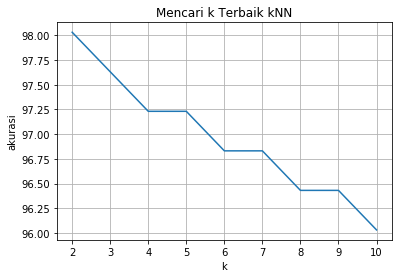

In [89]:
x = [i[0] for i in akurasi]
y = [i[1] for i in akurasi]
plt.plot(x,y)
plt.title("Mencari k Terbaik kNN")
plt.xlabel("k")
plt.ylabel("akurasi")
plt.grid()
plt.show
# plt.savefig("Mencari k Terbaik kNN") #menyimpan grafik